In [1]:
from fredapi import Fred
fred = Fred(api_key = '3c333fd92c7d3df79f55af2ee72f13bf')

Series imported from FRED: 
- NA000334Q, Gross Domestic Product, Millions of Dollars, Not Seasonally Adjusted, Quarterly, first obs: Q1 1947, last obs: Q2 2023.
- GDPDEF, Gross Domestic Product: Implicit Price Deflator, Index 2017 = 100, Seasonally Adjusted, Quarterly, first obs: Q1 1947, last obs: Q2 2023.
- B230RC0Q173SBEA, Population, Thousands, Not Seasonally Adjusted, Quarterly, first obs: Q1 1947, last obs: Q2 2023

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib import style
import datetime
from dateutil.relativedelta import relativedelta
from statsmodels.graphics.tsaplots import plot_acf
import math

plt.style.use('mystyle.mplstyle')

Import the Series: 

In [3]:
gdp = fred.get_series('NA000334Q')
prc_def = fred.get_series('GDPDEF')
pop = fred.get_series('B230RC0Q173SBEA')

In [4]:
temp_dict = {'GDP' : gdp,
            'Prc_def' : prc_def,
            'Pop' : pop}
df = pd.DataFrame(temp_dict)

In [5]:
df

,GDP,Prc_def,Pop
1947-01-01,58497.0,11.141,143143.0
1947-04-01,60672.0,11.299,143790.0
1947-07-01,62196.0,11.489,144449.0
1947-10-01,68250.0,11.772,145122.0
1948-01-01,64258.0,11.865,145709.0
...,...,...,...
2022-04-01,6414266.0,117.671,333321.0
2022-07-01,6539219.0,118.962,333799.0
2022-10-01,6701519.0,120.093,334282.0
2023-01-01,6546655.0,121.261,334641.0


In [6]:
def make_a_line():
    ax.plot([0.12, .9],                  # Set width of line
        [1.05, 1.05],                  # Set height of line
        transform=fig.transFigure,   # Set location relative to plot
        clip_on=False, 
        color='#E3120B', 
        linewidth=.6)
def make_a_rec():
    ax.add_patch(plt.Rectangle((0.12,1.05),                 # Set location of rectangle by lower left corder
                           0.04,                       # Width of rectangle
                           -0.02,                      # Height of rectangle. Negative so it goes down.
                           facecolor='#E3120B', 
                           transform=fig.transFigure, 
                           clip_on=False, 
                           linewidth = 0))
    
def make_title(text):
    ax.text(x=0.12, y=0.98, s=text, 
            transform=fig.transFigure, ha='left', 
            fontsize=13, weight='bold', alpha=.8)
    
def make_description(text):
    ax.text(x=0.12, y=0.93, s=text, 
            transform=fig.transFigure, ha='left', 
            fontsize=11, alpha=.8)
    
def plot(title, text):
    make_a_line()
    make_a_rec()
    make_title(title)
    make_description(text)

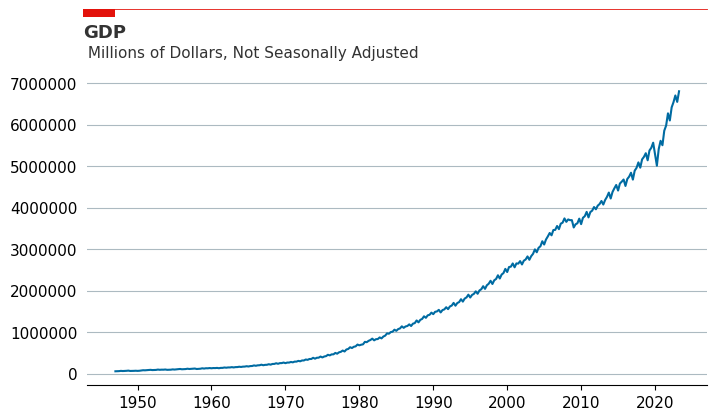

In [7]:
fig, ax = plt.subplots()

ax.plot(df.index, df.GDP, color='#006BA2', zorder = 2)
plt.ticklabel_format(style='plain', axis='y')
plot('GDP'," Millions of Dollars, Not Seasonally Adjusted")
plt.savefig('GDP.png')

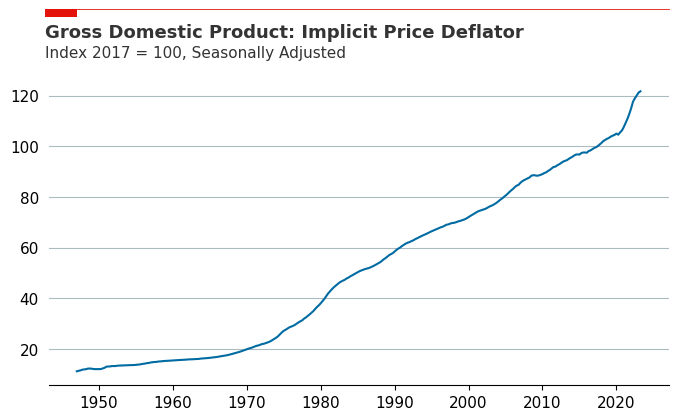

In [8]:
fig, ax = plt.subplots()

ax.plot(df.index, df.Prc_def, color='#006BA2', zorder = 2)
plt.ticklabel_format(style='plain', axis='y')
plot('Gross Domestic Product: Implicit Price Deflator',"Index 2017 = 100, Seasonally Adjusted")
plt.savefig('price_deflator.png')

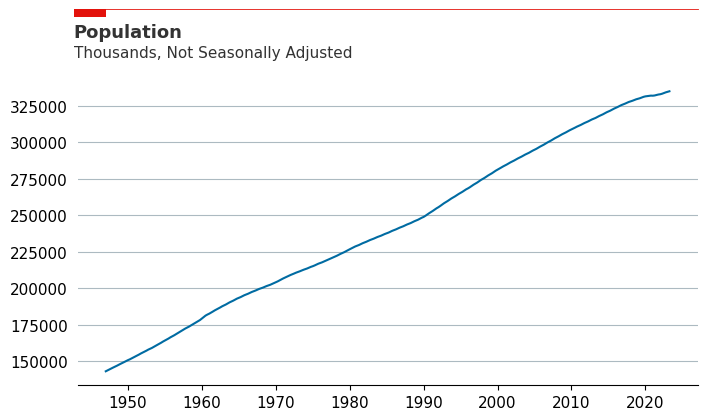

In [9]:
fig, ax = plt.subplots()

ax.plot(df.index, df.Pop, color='#006BA2', zorder = 2)
plt.ticklabel_format(style='plain', axis='y')
plot('Population',"Thousands, Not Seasonally Adjusted")
plt.savefig('Population.png')

In [10]:

pd.set_option('display.float_format', lambda x: '%.2f' % x)
des = df.describe()
#des.to_excel('descriptive.xlsx')
des

,GDP,Prc_def,Pop
count,306.00,306.00,306.00
mean,1755796.24,51.41,241838.19
std,1806439.37,32.89,56993.65
min,58497.00,11.14,143143.00
25%,200021.00,16.85,195891.50
50%,1067038.50,50.52,237924.50
75%,3022889.25,78.67,292715.50
max,6802375.00,121.77,335019.00


In [21]:

ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, df)  # where df is your data frame

ModuleNotFoundError: No module named 'pandas.table'

## Slide 3

In [11]:
df

,GDP,Prc_def,Pop
1947-01-01,58497.00,11.14,143143.00
1947-04-01,60672.00,11.30,143790.00
1947-07-01,62196.00,11.49,144449.00
1947-10-01,68250.00,11.77,145122.00
1948-01-01,64258.00,11.87,145709.00
...,...,...,...
2022-04-01,6414266.00,117.67,333321.00
2022-07-01,6539219.00,118.96,333799.00
2022-10-01,6701519.00,120.09,334282.00
2023-01-01,6546655.00,121.26,334641.00


In [13]:
df = df.loc['1970-01-01':'2022-10-01']
df['real_gdp'] = df.GDP/(df.Prc_def/100)
df['real_gdp_pc'] = (df.real_gdp*1000000) /(df.Pop*1000)

In [14]:
pd.options.display.float_format = '{:.2f}'.format
df

,GDP,Prc_def,Pop,real_gdp,real_gdp_pc
1970-01-01,253998.00,19.83,204086.00,1280748.29,6275.53
1970-04-01,268532.00,20.11,204721.00,1335448.58,6523.26
1970-07-01,268019.00,20.27,205419.00,1322049.03,6435.87
1970-10-01,282764.00,20.54,206130.00,1376583.42,6678.23
1971-01-01,273782.00,20.85,206763.00,1312914.21,6349.85
...,...,...,...,...,...
2021-10-01,6271538.00,112.85,332786.00,5557509.22,16699.95
2022-01-01,6098908.00,115.14,332978.00,5297179.83,15908.50
2022-04-01,6414266.00,117.67,333321.00,5451016.82,16353.66
2022-07-01,6539219.00,118.96,333799.00,5496897.33,16467.69


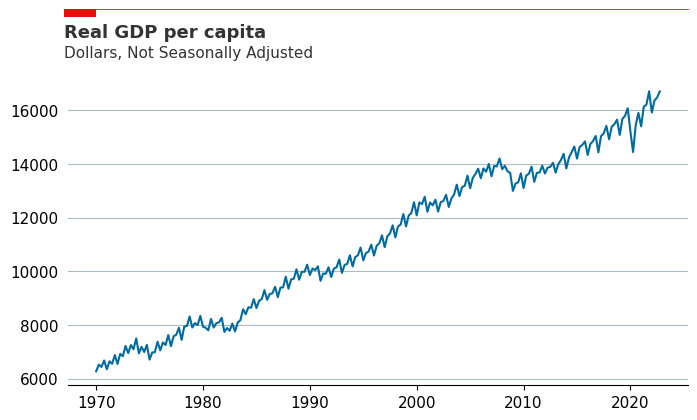

In [15]:
fig, ax = plt.subplots()

ax.plot(df.index, df.real_gdp_pc, color='#006BA2', zorder = 2)
plt.ticklabel_format(style='plain', axis='y')
plot('Real GDP per capita',"Dollars, Not Seasonally Adjusted")
plt.savefig("rdgppcts.png", bbox_inches = 'tight')

Plots for seasonality

In [16]:
df['real_gdp_pc_lag'] = df.real_gdp_pc.shift(1)
df

,GDP,Prc_def,Pop,real_gdp,real_gdp_pc,real_gdp_pc_lag
1970-01-01,253998.00,19.83,204086.00,1280748.29,6275.53,NaN
1970-04-01,268532.00,20.11,204721.00,1335448.58,6523.26,6275.53
1970-07-01,268019.00,20.27,205419.00,1322049.03,6435.87,6523.26
1970-10-01,282764.00,20.54,206130.00,1376583.42,6678.23,6435.87
1971-01-01,273782.00,20.85,206763.00,1312914.21,6349.85,6678.23
...,...,...,...,...,...,...
2021-10-01,6271538.00,112.85,332786.00,5557509.22,16699.95,16202.15
2022-01-01,6098908.00,115.14,332978.00,5297179.83,15908.50,16699.95
2022-04-01,6414266.00,117.67,333321.00,5451016.82,16353.66,15908.50
2022-07-01,6539219.00,118.96,333799.00,5496897.33,16467.69,16353.66


In [17]:
df['avg_rdgppc'] = 400 * np.log(df.real_gdp_pc/df.real_gdp_pc_lag)

In [18]:
np.nanmean(df['avg_rdgppc'])

1.8546919066353629

In [19]:
df

,GDP,Prc_def,Pop,real_gdp,real_gdp_pc,real_gdp_pc_lag,avg_rdgppc
1970-01-01,253998.00,19.83,204086.00,1280748.29,6275.53,NaN,NaN
1970-04-01,268532.00,20.11,204721.00,1335448.58,6523.26,6275.53,15.49
1970-07-01,268019.00,20.27,205419.00,1322049.03,6435.87,6523.26,-5.40
1970-10-01,282764.00,20.54,206130.00,1376583.42,6678.23,6435.87,14.79
1971-01-01,273782.00,20.85,206763.00,1312914.21,6349.85,6678.23,-20.17
...,...,...,...,...,...,...,...
2021-10-01,6271538.00,112.85,332786.00,5557509.22,16699.95,16202.15,12.10
2022-01-01,6098908.00,115.14,332978.00,5297179.83,15908.50,16699.95,-19.42
2022-04-01,6414266.00,117.67,333321.00,5451016.82,16353.66,15908.50,11.04
2022-07-01,6539219.00,118.96,333799.00,5496897.33,16467.69,16353.66,2.78


## Slide 5

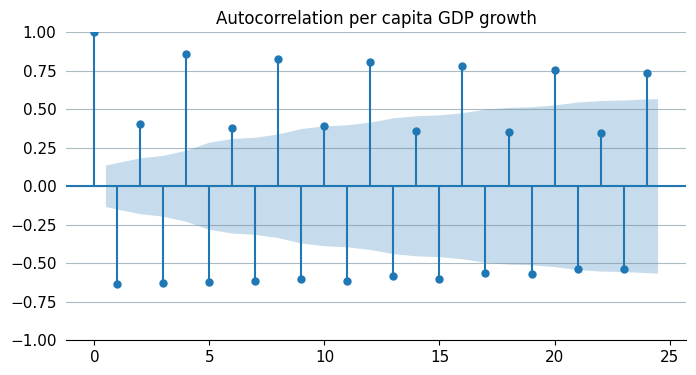

In [20]:
plot_acf(df.avg_rdgppc.values[1:]);
plt.title("Autocorrelation per capita GDP growth")
plt.savefig("Autocorrelation_gdp_growth.png")

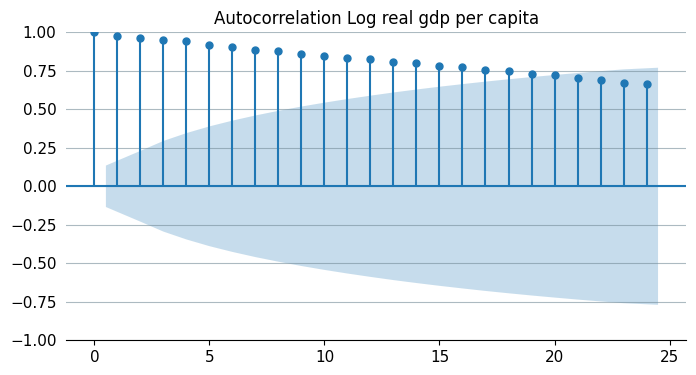

In [21]:
plot_acf(np.log(df.real_gdp_pc))
plt.title("Autocorrelation Log real gdp per capita")
plt.savefig("Autocorrelation_log_gdp_growth.png")

## Slide 6

Slide 6. Use data from 1970 to 2019 (last quarter) to estimate a Random Walk with Drift and a Seasonal Random Walk with Drift model for log(𝑟𝑔𝑑𝑝𝑝𝑐𝑡). Forecast 2020 (quarter 1)-2022 (quarter 4).
 Plot 𝑟𝑔𝑑𝑝𝑝𝑐𝑡 and the two forecasts for 𝑟𝑔𝑑𝑝𝑝𝑐𝑡 (you need to transform the log forecast).

In [22]:
df_train = df.loc[:'2019-10-01',]
df_test = df.loc['2020-01-01':'2022-10-01',]

In [23]:
df_test

,GDP,Prc_def,Pop,real_gdp,real_gdp_pc,real_gdp_pc_lag,avg_rdgppc
2020-01-01,5292718.00,105.04,331534.00,5038908.19,15198.77,16069.80,-22.29
2020-04-01,5009931.00,104.61,331699.00,4788968.02,14437.69,15198.77,-20.55
2020-07-01,5411028.00,105.54,331872.00,5127089.77,15449.00,14437.69,27.08
2020-10-01,5609276.00,106.28,332045.00,5278076.69,15895.67,15449.00,11.40
2021-01-01,5503213.00,107.67,331989.00,5111280.05,15395.93,15895.67,-12.78
2021-04-01,5853320.00,109.31,332149.00,5355034.08,16122.39,15395.93,18.44
2021-07-01,5975139.00,110.92,332480.00,5386890.55,16202.15,16122.39,1.97
2021-10-01,6271538.00,112.85,332786.00,5557509.22,16699.95,16202.15,12.10
2022-01-01,6098908.00,115.14,332978.00,5297179.83,15908.50,16699.95,-19.42
2022-04-01,6414266.00,117.67,333321.00,5451016.82,16353.66,15908.50,11.04


Estimate parameter c

In [26]:
c_hat = (log_rdgppct[-1] - log_rdgppct[1])/(len(log_rdgppct)-1)

In [25]:
log_rdgppct = np.log(df_train.real_gdp_pc)

In [27]:
c_hat

0.004530487409344429

In [28]:
estimation_drift = [h*c_hat + log_rdgppct[-1] for h in range(len(df_test))]

In [29]:
estimation_drift = np.exp(estimation_drift)

In [30]:
estimation_drift = pd.Series(estimation_drift, index=df_test.index)

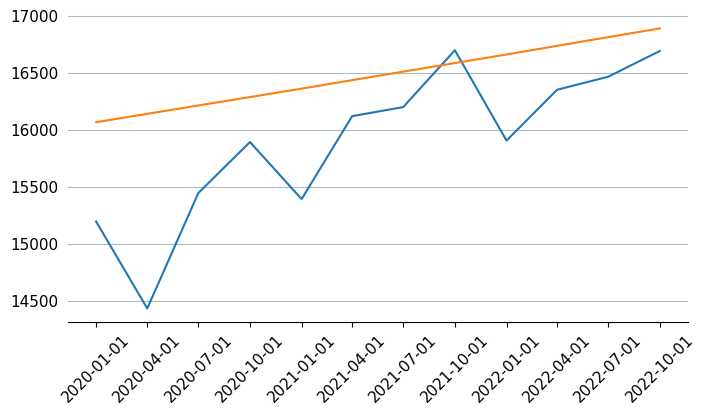

In [31]:
ticks = list(df_test.index)
fig, ax = plt.subplots()
ax.plot(df_test.index, df_test.real_gdp_pc)
ax.plot(estimation_drift)
plt.xticks(ticks, rotation=45);

### Now with seasonal drift

In [32]:
seasonal = log_rdgppct[-4:]

In [33]:
seasonal

2019-01-01   9.62
2019-04-01   9.66
2019-07-01   9.67
2019-10-01   9.68
Name: real_gdp_pc, dtype: float64

In [34]:
rw_seasonal = []
for i in range(3):
    for x in seasonal: 
        rw_seasonal.append(x)

In [35]:
rw_seasonal

[9.620688017766161,
 9.659512303796713,
 9.66693010457298,
 9.684696724519863,
 9.620688017766161,
 9.659512303796713,
 9.66693010457298,
 9.684696724519863,
 9.620688017766161,
 9.659512303796713,
 9.66693010457298,
 9.684696724519863]

Devi moltiplicare per h sotto

In [36]:
rw_seasonal = [c_hat*(h+1) + x for h,x in enumerate(rw_seasonal)]

In [37]:
rw_seasonal

[9.625218505175505,
 9.668573278615403,
 9.680521566801014,
 9.70281867415724,
 9.643340454812883,
 9.68669522825278,
 9.698643516438391,
 9.720940623794618,
 9.661462404450262,
 9.704817177890158,
 9.716765466075769,
 9.739062573431996]

In [38]:
c_hat

0.004530487409344429

In [39]:
rw_seasonal = np.exp(rw_seasonal)

In [40]:
rw_seasonal

array([15141.8620042 , 15812.77250146, 16002.84130152, 16363.66609775,
       15418.76348425, 16101.94302145, 16295.48763789, 16662.91089078,
       15700.7287028 , 16396.4016457 , 16593.48564129, 16967.62801779])

In [41]:
rw_seasonal = pd.Series(rw_seasonal, df_test.index)

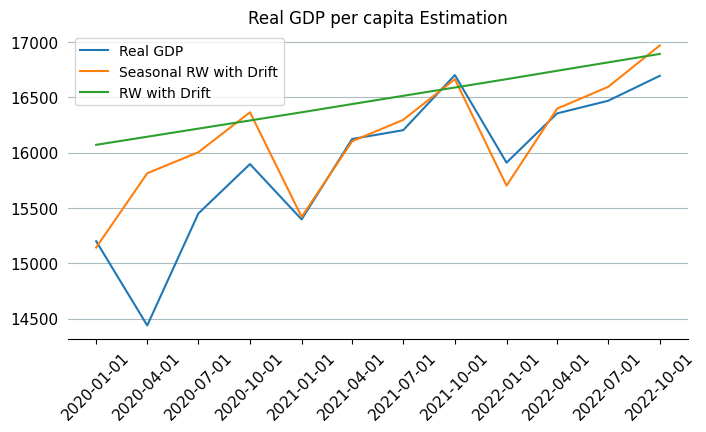

In [46]:

fig, ax = plt.subplots()
ax.plot(df_test.real_gdp_pc, label = 'Real GDP')
ax.plot(rw_seasonal, label = "Seasonal RW with Drift")
ax.plot(estimation_drift, label = "RW with Drift")
ax.legend()
plt.xticks(ticks, rotation = 45);
plt.title("Real GDP per capita Estimation");
plt.savefig("gdp_estimation", bbox_inches = 'tight')

# Slide 7

RMSE = $\sqrt{\frac{\sum^T_{t=1}(\hat{y_t}-y_t)^2}{T}}$

In [95]:
rmse_seasonal = ((sum((df_test.real_gdp_pc - rw_seasonal).values))/12)**(1/2)

C:\Users\tifos\AppData\Local\Temp\ipykernel_8712\3879249086.py:1: RuntimeWarning: invalid value encountered in scalar power
  rmse_seasonal = ((sum((df_test.real_gdp_pc - rw_seasonal).values))/12)**(1/2)


In [108]:
error = (df_test.real_gdp_pc - rw_seasonal).values
squared_error =  error**2
rmse_seasonal = ((sum(squared_error))/12)**(1/2)

In [109]:
rmse_seasonal

462.5060667341434

In [110]:
error = (df_test.real_gdp_pc - estimation_drift).values
squared_error =  error**2
rmse_drift = ((sum(squared_error))/12)**(1/2)

In [111]:
rmse_drift

732.0869567847446